In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

In [3]:
# Load and Prepare Data for "Monthly Sunspots"
sunspots_data = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv", skiprows=1)
sunspots_data.columns = ['Month', 'Sunspots']
sunspots_data['Month'] = pd.to_datetime(sunspots_data['Month'])
sunspots_data.set_index('Month', inplace=True)

In [4]:
# Display the first few rows of the data
print(sunspots_data.head())

            Sunspots
Month               
1749-02-01      62.6
1749-03-01      70.0
1749-04-01      55.7
1749-05-01      85.0
1749-06-01      83.5


In [5]:
# Load and Prepare Data for "Daily Minimum Temperatures"
temperatures_data = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv")
temperatures_data['Date'] = pd.to_datetime(temperatures_data['Date'])
temperatures_data.set_index('Date', inplace=True)

In [6]:
print(temperatures_data.head())

            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8


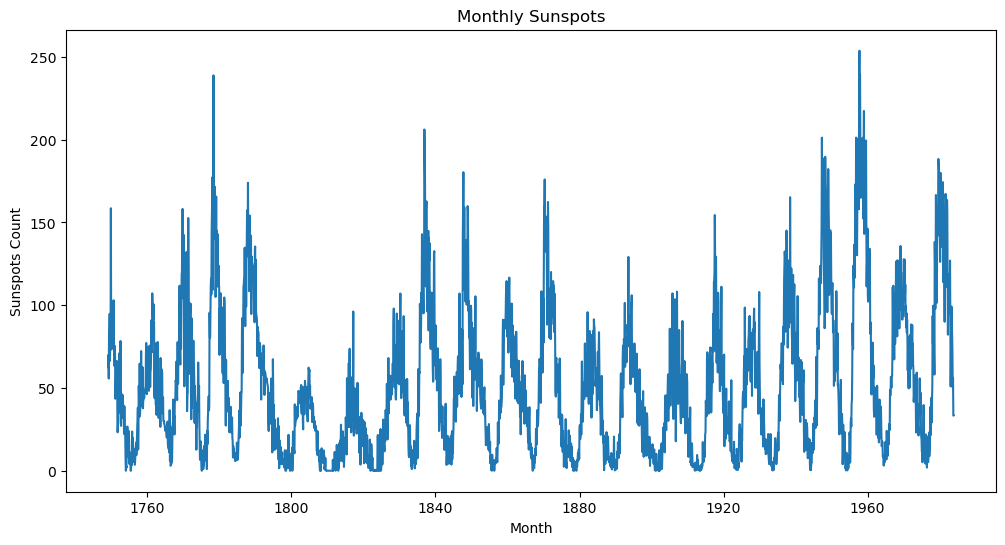

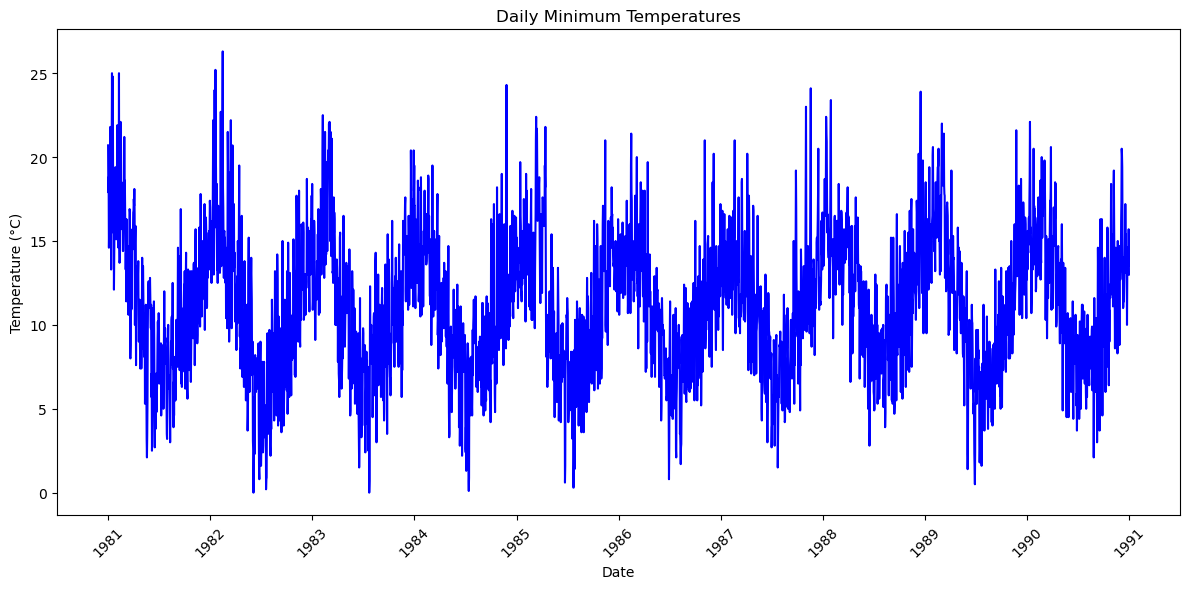

In [7]:
#EDA

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(sunspots_data.index, sunspots_data['Sunspots'])
plt.title("Monthly Sunspots")
plt.xlabel("Month")
plt.ylabel("Sunspots Count")
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(temperatures_data.index, temperatures_data['Temp'], color='blue')
plt.title("Daily Minimum Temperatures")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

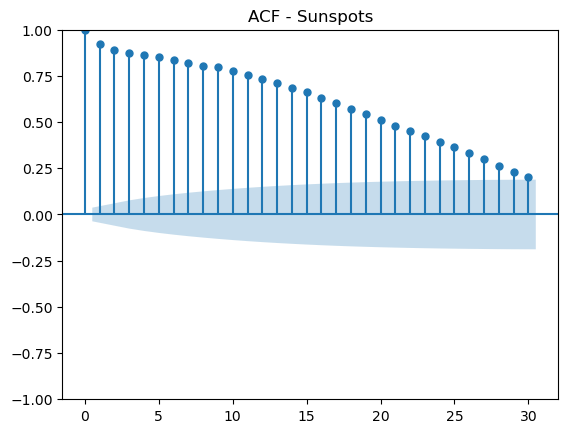

S:\Karim\Internship\Anaconda\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


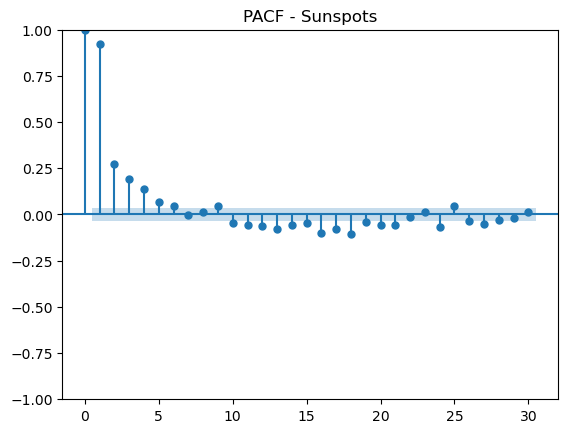

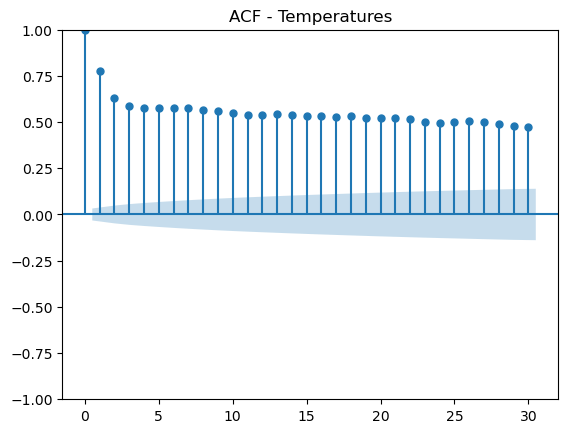

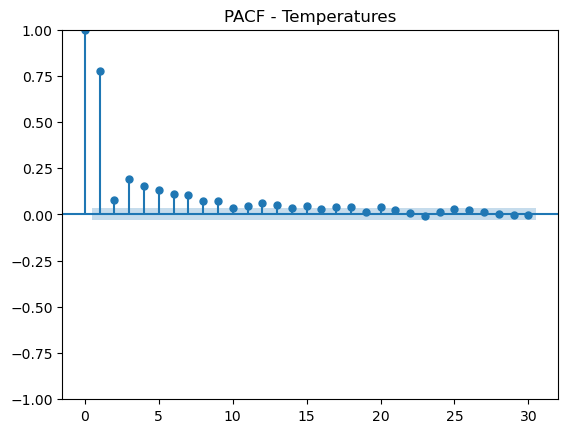

In [8]:
# Autocorrelation and Partial Autocorrelation

# Plot ACF and PACF
plt.figure(figsize=(12, 6))

plot_acf(sunspots_data['Sunspots'], lags=30)
plt.title("ACF - Sunspots")
plt.show()

plot_pacf(sunspots_data['Sunspots'], lags=30)
plt.title("PACF - Sunspots")
plt.show()

plot_acf(temperatures_data['Temp'], lags=30)
plt.title("ACF - Temperatures")
plt.show()

plot_pacf(temperatures_data['Temp'], lags=30)
plt.title("PACF - Temperatures")
plt.show()


S:\Karim\Internship\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
S:\Karim\Internship\Anaconda\Lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
S:\Karim\Internship\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
S:\Karim\Internship\Anaconda\Lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending.

Mean Squared Error (AR): 3890.4564342410467
Mean Squared Error (MA): 3846.201853989757


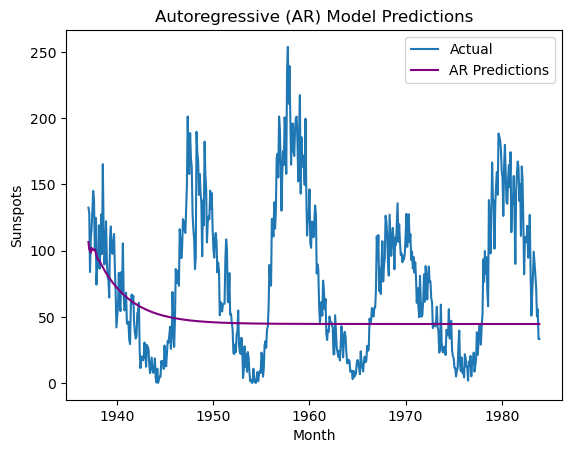

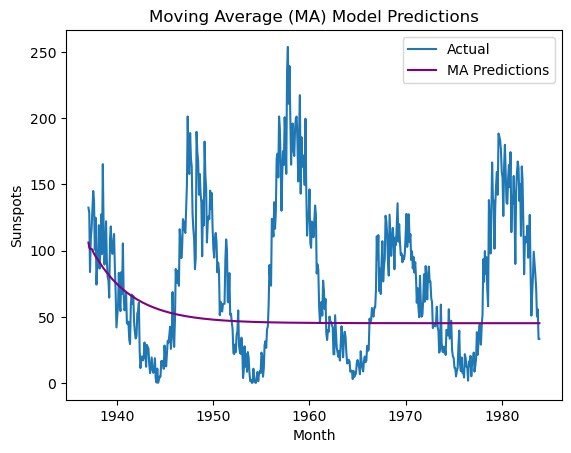

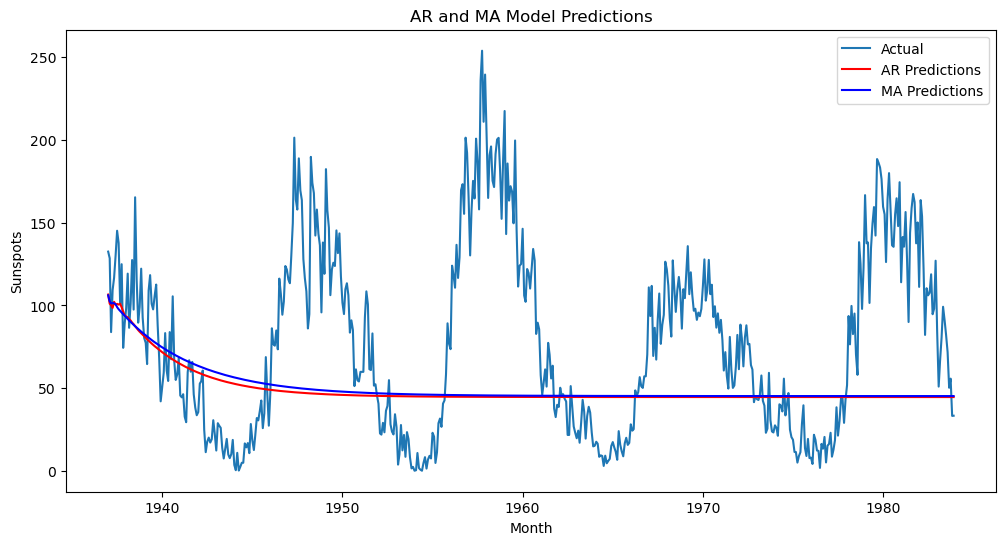

In [9]:
# Models for Monthly sunspots data

# Load and preprocess the sunspots data
sunspots_data = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv", parse_dates=["Month"], index_col="Month")
train_size = int(0.8 * len(sunspots_data))
train_data, test_data = sunspots_data.iloc[:train_size], sunspots_data.iloc[train_size:]

# Fit and predict using AR model
ar_order = 12  # Choose the order of the AR model
ar_model = AutoReg(train_data, lags=ar_order)
ar_model_fit = ar_model.fit()
ar_predictions = ar_model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

# Fit and predict using MA model
ma_order = 6  # Choose the order of the MA model
ma_model = AutoReg(train_data, lags=ma_order, trend='c')
ma_model_fit = ma_model.fit()
ma_predictions = ma_model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

# Calculate Mean Squared Error for AR and MA models
mse_ar = mean_squared_error(test_data, ar_predictions)
mse_ma = mean_squared_error(test_data, ma_predictions)

print("Mean Squared Error (AR):", mse_ar)
print("Mean Squared Error (MA):", mse_ma)

# Plot the actual data and predictions for the AR model
plt.plot(test_data, label='Actual')
plt.plot(ar_predictions, color='purple', label='AR Predictions')
plt.title("Autoregressive (AR) Model Predictions")
plt.xlabel("Month")
plt.ylabel("Sunspots")
plt.legend()
plt.show()

# Plot the actual data and predictions for the MA model
plt.plot(test_data, label='Actual')
plt.plot(ma_predictions, color='purple', label='MA Predictions')
plt.title("Moving Average (MA) Model Predictions")
plt.xlabel("Month")
plt.ylabel("Sunspots")
plt.legend()
plt.show()

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(test_data, label='Actual')
plt.plot(ar_predictions, color='red', label='AR Predictions')
plt.plot(ma_predictions, color='blue', label='MA Predictions')
plt.title("AR and MA Model Predictions")
plt.xlabel("Month")
plt.ylabel("Sunspots")
plt.legend()
plt.show()

S:\Karim\Internship\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
S:\Karim\Internship\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
S:\Karim\Internship\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
S:\Karim\Internship\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting a

Mean Squared Error (ARMA): 10.86268743696565


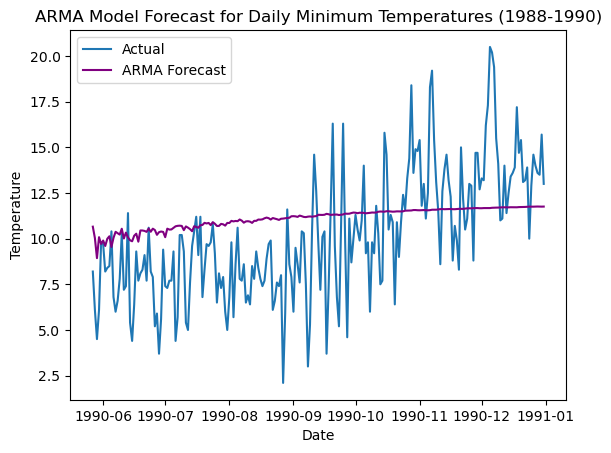

S:\Karim\Internship\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
S:\Karim\Internship\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
S:\Karim\Internship\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Mean Squared Error (AR): 10.389790027408608


S:\Karim\Internship\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


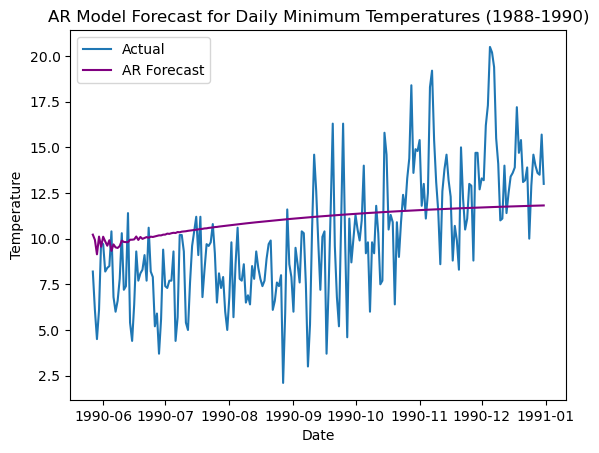

S:\Karim\Internship\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
S:\Karim\Internship\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
S:\Karim\Internship\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
S:\Karim\Internship\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_predic

Mean Squared Error (MA): 15.042192759404829


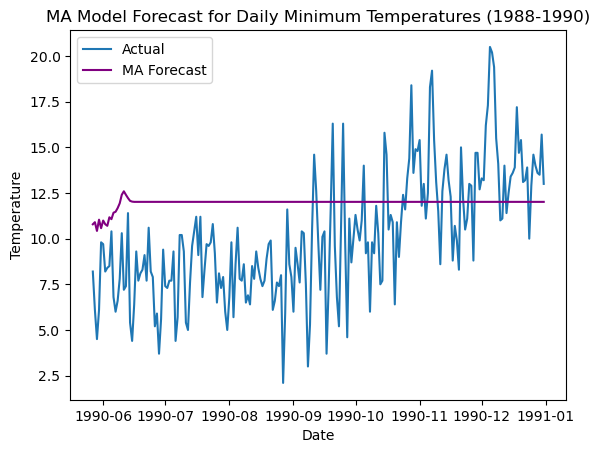

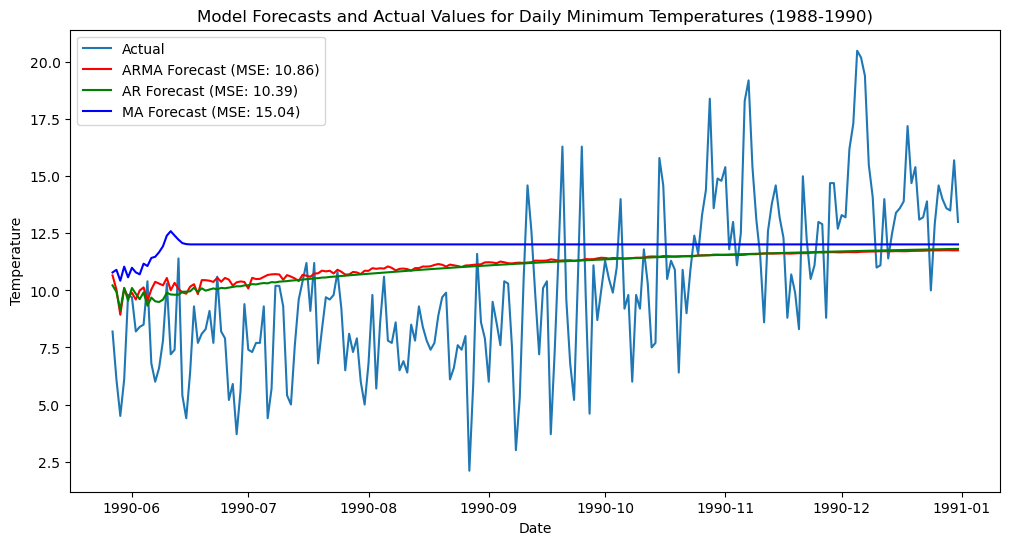

In [11]:
# Models for Daily minimum temperature data

# Load and preprocess data
temperature_data = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv", parse_dates=["Date"], index_col="Date")

# Extract data for the desired range (1988 to 1990)
start_date = "1988-01-01"
end_date = "1990-12-31"
selected_data = temperature_data[start_date:end_date]

# Split data into train and test sets
train_size = int(0.8 * len(selected_data))
train_data, test_data = selected_data.iloc[:train_size], selected_data.iloc[train_size:]

# Fit ARMA model
p_arma = 20  # Example AR order, adjust as needed
q_arma = 20  # Example MA order, adjust as needed
arma_model = ARIMA(train_data, order=(p_arma, 0, q_arma))
arma_model_fit = arma_model.fit()

# Forecast using ARMA model
forecast_steps = len(test_data)
arma_forecast = arma_model_fit.forecast(steps=forecast_steps)

# Evaluate the ARMA model
mse_arma = mean_squared_error(test_data, arma_forecast)
print("Mean Squared Error (ARMA):", mse_arma)

# Plot predictions and actual values for ARMA model
plt.plot(test_data, label="Actual")
plt.plot(test_data.index, arma_forecast, color='purple', label="ARMA Forecast")
plt.title("ARMA Model Forecast for Daily Minimum Temperatures (1988-1990)")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.show()

# Fit AR model (p value from ARMA model)
p = 20  # Example AR order, adjust as needed
ar_model = ARIMA(train_data, order=(p, 0, 0))
ar_model_fit = ar_model.fit()

# Forecast using AR model
ar_forecast = ar_model_fit.forecast(steps=forecast_steps)

# Evaluate the AR model
mse_ar = mean_squared_error(test_data, ar_forecast)
print("Mean Squared Error (AR):", mse_ar)

# Plot predictions and actual values for AR model
plt.plot(test_data, label="Actual")
plt.plot(test_data.index, ar_forecast, color='purple', label="AR Forecast")
plt.title("AR Model Forecast for Daily Minimum Temperatures (1988-1990)")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.show()

# Fit MA model (q value from ARMA model)
q = 20  # Example MA order, adjust as needed
ma_model = ARIMA(train_data, order=(0, 0, q))
ma_model_fit = ma_model.fit()

# Forecast using MA model
ma_forecast = ma_model_fit.forecast(steps=forecast_steps)

# Evaluate the MA model
mse_ma = mean_squared_error(test_data, ma_forecast)
print("Mean Squared Error (MA):", mse_ma)

# Plot predictions and actual values for MA model
plt.plot(test_data, label="Actual")
plt.plot(test_data.index, ma_forecast, color='purple', label="MA Forecast")
plt.title("MA Model Forecast for Daily Minimum Temperatures (1988-1990)")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.show()

# Plot predictions and actual values for all models
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label="Actual")
plt.plot(test_data.index, arma_forecast, color='red', label="ARMA Forecast (MSE: {:.2f})".format(mse_arma))
plt.plot(test_data.index, ar_forecast, color='green', label="AR Forecast (MSE: {:.2f})".format(mse_ar))
plt.plot(test_data.index, ma_forecast, color='blue', label="MA Forecast (MSE: {:.2f})".format(mse_ma))
plt.title("Model Forecasts and Actual Values for Daily Minimum Temperatures (1988-1990)")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.show()
